In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [151]:
df_0_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_0_shot.csv')
df_3_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_3_shot.csv')


In [152]:
df_0_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34440 entries, 0 to 34439
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        34440 non-null  object 
 1   Benchmark prompt           34440 non-null  object 
 2   Execution time (s)         34440 non-null  object 
 3   CPU Energy (J)             34440 non-null  object 
 4   RAM Energy (J)             34440 non-null  object 
 5   GPU Energy (J)             34440 non-null  object 
 6   CPU Power (W)              34440 non-null  object 
 7   RAM Power (W)              34440 non-null  object 
 8   GPU Power (W)              34440 non-null  object 
 9   CO2 emissions (Kg)         34440 non-null  object 
 10  CO2 emissions rate (Kg/s)  34440 non-null  object 
 11  Pass@1                     34440 non-null  float64
 12  Pass@10                    34440 non-null  float64
 13  GoogleBLEU                 34440 non-null  flo

In [153]:
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33810 entries, 0 to 33809
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        33810 non-null  object 
 1   Benchmark prompt           33810 non-null  object 
 2   Execution time (s)         33810 non-null  object 
 3   CPU Energy (J)             33810 non-null  object 
 4   RAM Energy (J)             33810 non-null  object 
 5   GPU Energy (J)             33810 non-null  object 
 6   CPU Power (W)              33810 non-null  object 
 7   RAM Power (W)              33810 non-null  object 
 8   GPU Power (W)              33810 non-null  object 
 9   CO2 emissions (Kg)         33810 non-null  object 
 10  CO2 emissions rate (Kg/s)  33810 non-null  object 
 11  Pass@1                     33810 non-null  float64
 12  Pass@10                    33810 non-null  float64
 13  GoogleBLEU                 33810 non-null  flo

### Remove execution/lines with "ERROR"

In [154]:
# Remove rows where at least one column contains 'Error'
df_0_shot = df_0_shot[~df_0_shot.isin(['ERROR']).any(axis=1)]
df_3_shot = df_3_shot[~df_3_shot.isin(['ERROR']).any(axis=1)]


### Cast data types

In [155]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)
df_0_shot

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,codegeex4-all-9b-Q6_K_L,CPP/0,132.073570,9319.037920,1545.810825,355.498284,64.913202,11.705788,2.637476,0.000731,0.000006,0.010976,0.085366,0.105386,0.221068,9.751692
1,codegeex4-all-9b-Q6_K_L,CPP/0,16.343099,1072.663639,191.258240,45.322036,64.854828,11.705788,2.695437,0.000085,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
2,codegeex4-all-9b-Q6_K_L,CPP/0,126.372966,8215.339606,1479.091709,341.446273,64.894342,11.705788,2.536212,0.000654,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
3,codegeex4-all-9b-Q6_K_L,CPP/0,126.331573,8214.154793,1478.607433,356.680285,64.886760,11.705788,2.850919,0.000655,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
4,codegeex4-all-9b-Q6_K_L,CPP/0,44.578817,2906.139294,521.768781,129.671104,64.916582,11.705788,2.838451,0.000232,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34435,starling-lm-7b-alpha.Q5_K_S,JavaScript/163,84.732597,5542.136059,991.734608,1492.677194,64.909633,11.705788,17.694368,0.000523,0.000006,0.098780,0.396341,0.087638,0.197122,7.419054
34436,starling-lm-7b-alpha.Q5_K_S,JavaScript/163,84.722660,5542.481517,991.619766,1503.374203,64.911157,11.705788,17.814503,0.000524,0.000006,0.098780,0.396341,0.087638,0.197122,7.419054
34437,starling-lm-7b-alpha.Q5_K_S,JavaScript/163,84.731861,5543.009043,991.728945,1490.969193,64.903769,11.705788,17.595052,0.000523,0.000006,0.098780,0.396341,0.087638,0.197122,7.419054
34438,starling-lm-7b-alpha.Q5_K_S,JavaScript/163,84.717472,5541.782787,991.560323,1473.779179,64.915616,11.705788,17.395368,0.000522,0.000006,0.098780,0.396341,0.087638,0.197122,7.419054


In [156]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_3_shot['LLM'] = df_3_shot['LLM'].astype(str)
df_3_shot['Benchmark prompt'] = df_3_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_3_shot[float_columns] = df_3_shot[float_columns].astype(float)
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32391 entries, 0 to 33809
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        32391 non-null  object 
 1   Benchmark prompt           32391 non-null  object 
 2   Execution time (s)         32391 non-null  float64
 3   CPU Energy (J)             32391 non-null  float64
 4   RAM Energy (J)             32391 non-null  float64
 5   GPU Energy (J)             32391 non-null  float64
 6   CPU Power (W)              32391 non-null  float64
 7   RAM Power (W)              32391 non-null  float64
 8   GPU Power (W)              32391 non-null  float64
 9   CO2 emissions (Kg)         32391 non-null  float64
 10  CO2 emissions rate (Kg/s)  32391 non-null  float64
 11  Pass@1                     32391 non-null  float64
 12  Pass@10                    32391 non-null  float64
 13  GoogleBLEU                 32391 non-null  flo

### Calculating mean values for HumanEval-X

In [157]:
# Extract keywords from "Benchmark prompt"
df_0_shot['Programming Language'] = df_0_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_3_shot['Programming Language'] = df_3_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')

df_0_shot['Programming Language'] = df_0_shot['Programming Language'].replace('CPP', 'C++')
df_3_shot['Programming Language'] = df_3_shot['Programming Language'].replace('CPP', 'C++')

# Print unique programming languages
print(f"df_0_shot -> {df_0_shot['Programming Language'].dropna().unique()}")
print(f"df_3_shot -> {df_3_shot['Programming Language'].dropna().unique()}")

# Check if unique programming languages are the same
if set(df_0_shot['Programming Language'].dropna().unique()) == set(df_3_shot['Programming Language'].dropna().unique()):
    print("Same languages!")
else:
    print("[WARNING] At least 1 language is not present in both dataframes")


df_0_shot -> ['C++' 'Go' 'Python' 'Java' 'JavaScript']
df_3_shot -> ['JavaScript' 'C++' 'Java' 'Python' 'Go']
Same languages!


In [158]:
# Function to remove outliers using the IQR method and return the number of removed outliers and original count
def remove_outliers_and_count(group):
    # Calculate IQR for 'CPU Energy (J)'
    Q1 = group['CPU Energy (J)'].quantile(0.25)
    Q3 = group['CPU Energy (J)'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_group = group[(group['CPU Energy (J)'] >= lower_bound) & (group['CPU Energy (J)'] <= upper_bound)]
    
    # Calculate the number of outliers removed
    num_removed = len(group) - len(filtered_group)
    
    # Return the filtered group and the number of removed outliers, as well as the original count
    return filtered_group, num_removed, len(group)

# Initialize lists to store the number of outliers removed and original counts for each subset
outliers_list_0 = []
outliers_list_3 = []

# Remove outliers and count them for df_0_shot
df_0_no_outliers_list = []
for (llm, prompt), group in df_0_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_0_no_outliers_list.append(filtered_group)
    outliers_list_0.append([llm, prompt, num_removed, original_count])  # Store original count

df_0_no_outliers = pd.concat(df_0_no_outliers_list).reset_index(drop=True)

# Remove outliers and count them for df_3_shot
df_3_no_outliers_list = []
for (llm, prompt), group in df_3_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_3_no_outliers_list.append(filtered_group)
    outliers_list_3.append([llm, prompt, num_removed, original_count])  # Store original count

df_3_no_outliers = pd.concat(df_3_no_outliers_list).reset_index(drop=True)

In [159]:
# Create DataFrames to hold the outliers list with original counts
columns = ['LLM', 'Benchmark prompt', 'Outliers removed', 'Original count']
df_outliers_0 = pd.DataFrame(outliers_list_0, columns=columns)
df_outliers_3 = pd.DataFrame(outliers_list_3, columns=columns)

# Display the results
print("Outliers removed in df_0_shot:")
df_outliers_0



Outliers removed in df_0_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/0,0,10
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/1,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,0,10
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,0,10
...,...,...,...,...
3275,starling-lm-7b-alpha.Q5_K_S,Python/95,2,9
3276,starling-lm-7b-alpha.Q5_K_S,Python/96,2,10
3277,starling-lm-7b-alpha.Q5_K_S,Python/97,2,10
3278,starling-lm-7b-alpha.Q5_K_S,Python/98,1,10


In [160]:
print("\nOutliers removed in df_3_shot:")
df_outliers_3


Outliers removed in df_3_shot:


,LLM,Benchmark prompt,Outliers removed,Original count
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP/10,1,8
1,Meta-Llama-3-8B-Instruct-Q6_K,CPP/100,0,10
2,Meta-Llama-3-8B-Instruct-Q6_K,CPP/101,0,9
3,Meta-Llama-3-8B-Instruct-Q6_K,CPP/102,2,10
4,Meta-Llama-3-8B-Instruct-Q6_K,CPP/103,0,8
...,...,...,...,...
3376,starling-lm-7b-alpha.Q5_K_S,Python/95,1,10
3377,starling-lm-7b-alpha.Q5_K_S,Python/96,1,10
3378,starling-lm-7b-alpha.Q5_K_S,Python/97,2,10
3379,starling-lm-7b-alpha.Q5_K_S,Python/98,2,9


In [161]:
# Check how many prompt_id remains in each programming language after the outliers removal

print("----------------------- 0-shot -----------------------")
print(f"Java ->  {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'CPP']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")

print("----------------------- 3-shot -----------------------")
print(f"Java ->  {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'CPP']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")


----------------------- 0-shot -----------------------
Java ->  164
C++ -> 0
JavaScript -> 164
Go -> 164
Python -> 164
----------------------- 3-shot -----------------------
Java ->  161
C++ -> 0
JavaScript -> 161
Go -> 161
Python -> 161


### Create dataframes with all the average values

In [162]:
# List of columns to calculate the mean for
columns_to_average = ['CPU Energy (J)', 'Execution time (s)', 'Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU']

# Grouping by LLM and Programming Language, and calculating the mean for the specified columns
df_0_averages = df_0_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()
df_3_averages = df_3_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()

df_3_averages

,LLM,Programming Language,CPU Energy (J),Execution time (s),Pass@1,Pass@10,CodeBLEU,SacreBLEU,GoogleBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,2498.088763,37.609332,0.298758,0.608696,0.256334,19.098308,0.193793
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,1290.071103,19.561142,0.346584,0.645963,0.307899,27.333915,0.256980
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,1211.010118,17.793482,0.496894,0.726708,0.391835,42.248670,0.387080
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1356.097045,20.421712,0.407453,0.751553,0.216055,18.780953,0.186412
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,1095.426527,16.229704,0.528571,0.745342,0.279541,17.642362,0.182752
5,codegeex4-all-9b-Q6_K_L,C++,3638.189138,55.737993,0.263975,0.639752,0.230221,16.596874,0.166656
6,codegeex4-all-9b-Q6_K_L,Go,2460.001844,37.469290,0.370807,0.795031,0.271301,19.732550,0.185401
7,codegeex4-all-9b-Q6_K_L,Java,2033.195005,31.012094,0.477019,0.807453,0.337662,28.360016,0.261454
8,codellama-7b-instruct.Q5_K_M,C++,1402.815279,21.199700,0.255901,0.515528,0.257876,38.794416,0.346307
9,codellama-7b-instruct.Q5_K_M,Go,1237.469210,18.560791,0.273292,0.540373,0.281981,28.981726,0.280966


### Plots

#### Compare CPU Energy for all LLMs (0-shot and 3-shot)

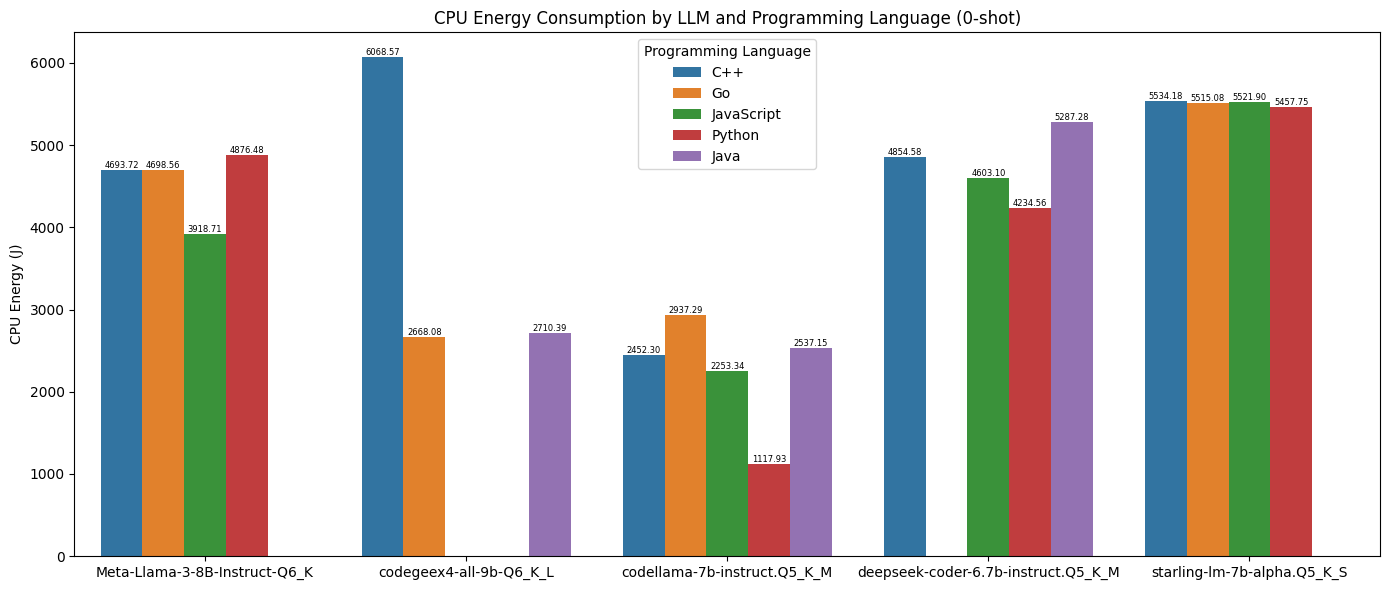

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o barplot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df_0_averages, x='LLM', y='CPU Energy (J)', hue='Programming Language')

# Adicionar títulos e rótulos
plt.title('CPU Energy Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')
plt.legend(title='Programming Language')

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=6)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.tight_layout()
plt.show()


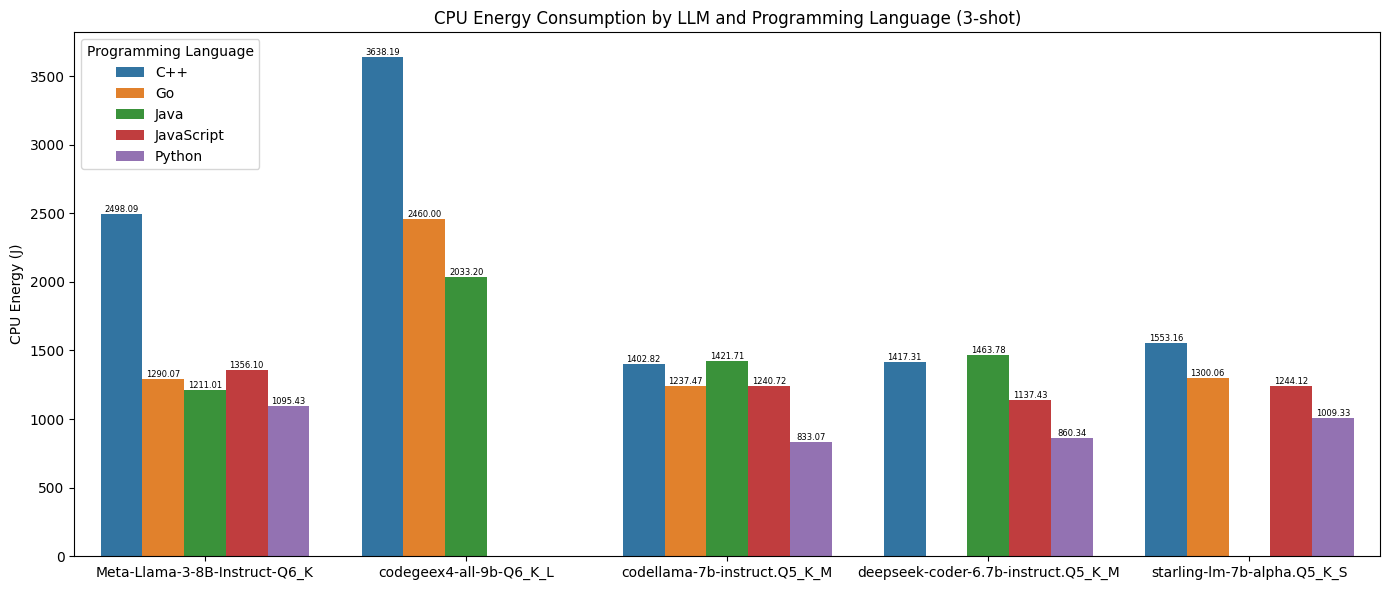

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o barplot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df_3_averages, x='LLM', y='CPU Energy (J)', hue='Programming Language')

# Adicionar títulos e rótulos
plt.title('CPU Energy Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')
plt.legend(title='Programming Language')

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=6)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.tight_layout()
plt.show()


#### Compare Execution time for all LLMs (0-shot and 3-shot)

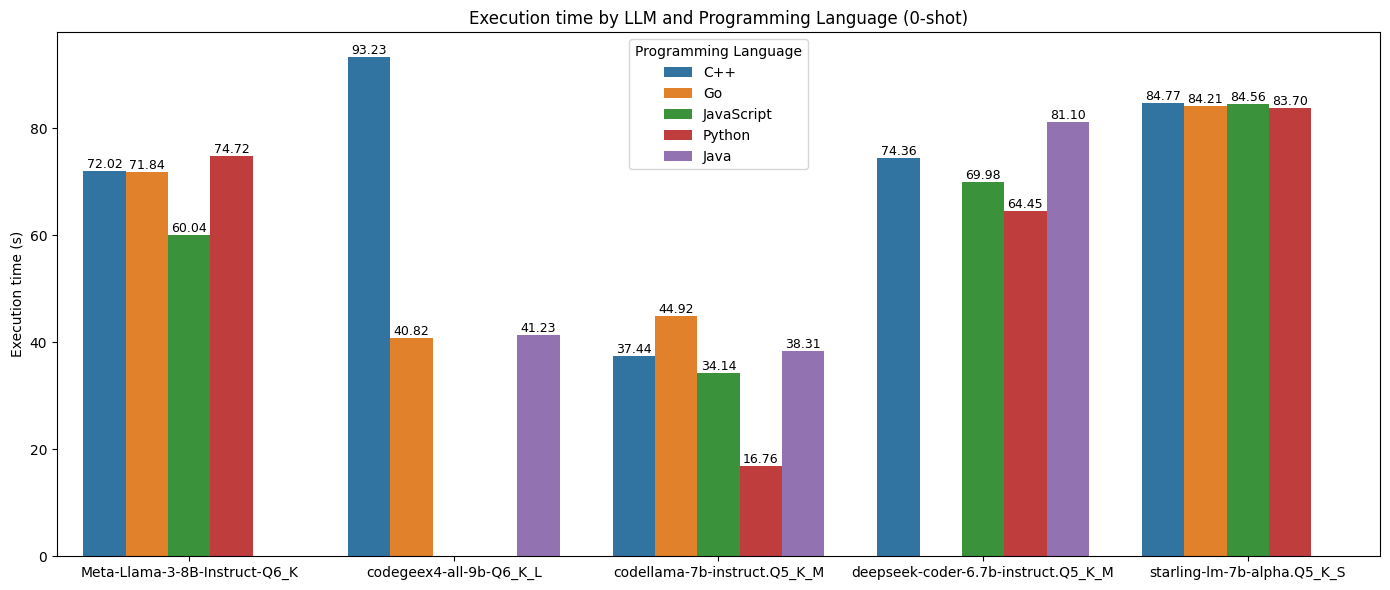

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o barplot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df_0_averages, x='LLM', y='Execution time (s)', hue='Programming Language')

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')
plt.legend(title='Programming Language')

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.tight_layout()
plt.show()


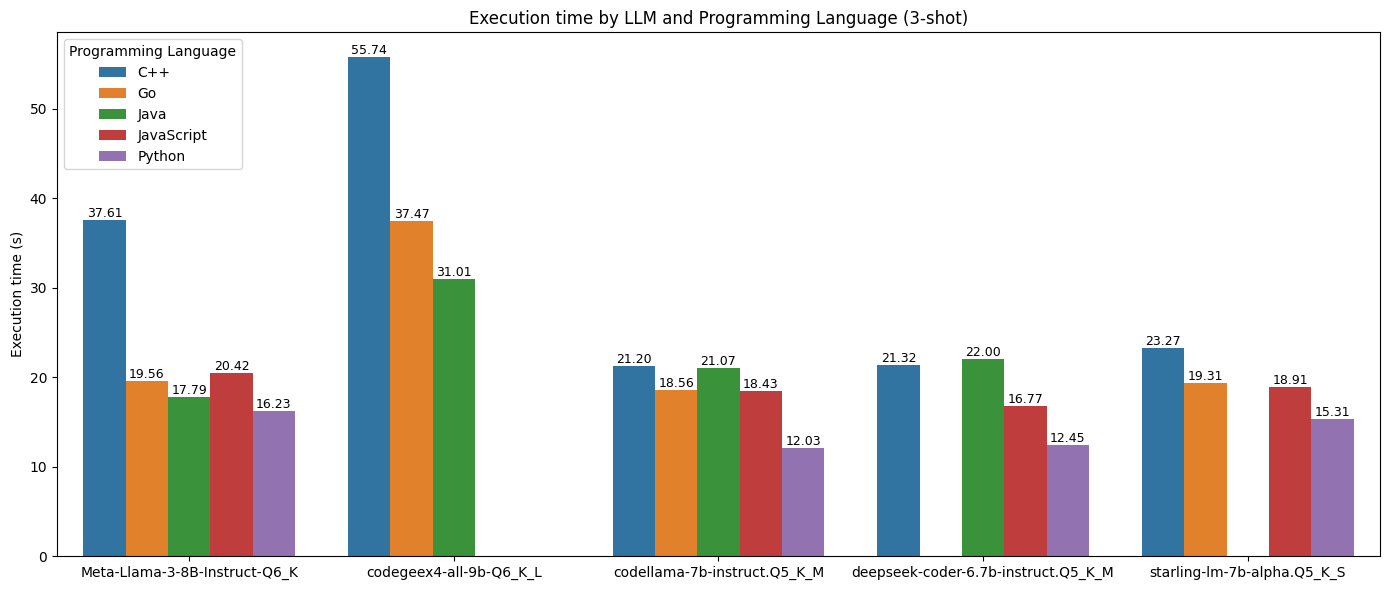

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o barplot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df_3_averages, x='LLM', y='Execution time (s)', hue='Programming Language')

# Adicionar títulos e rótulos
plt.title('Execution time by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Execution time (s)')
plt.legend(title='Programming Language')

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.tight_layout()
plt.show()


#### Differences from 0-shot to 3-shot

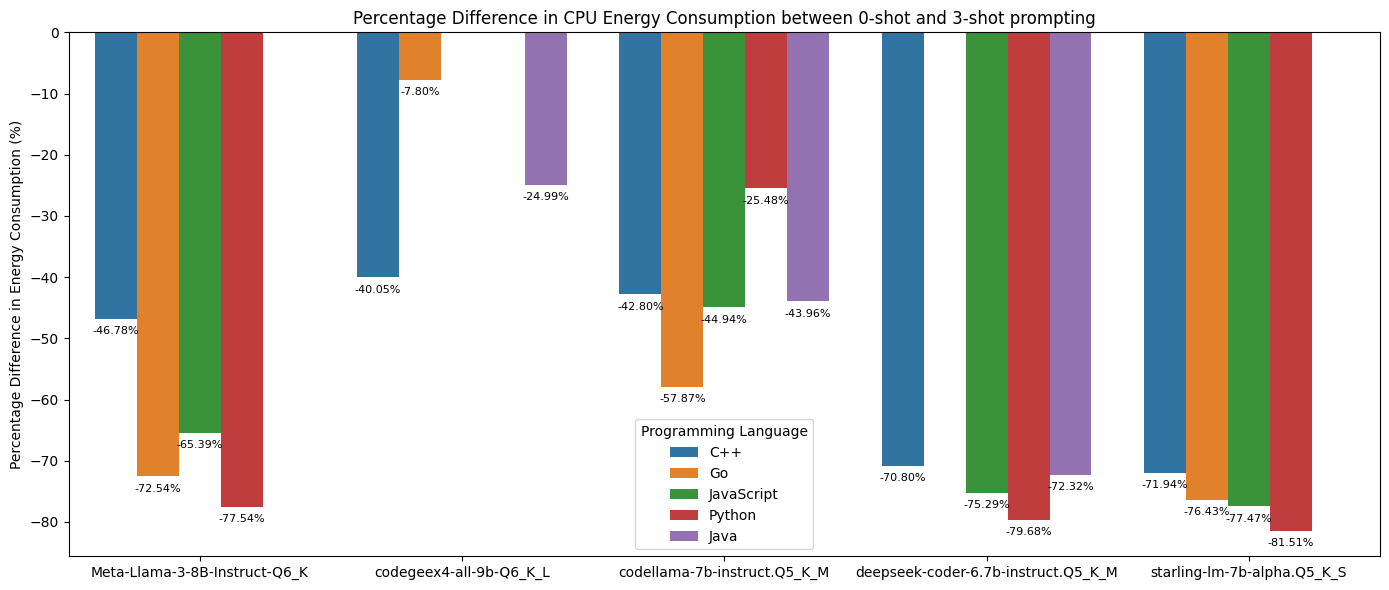

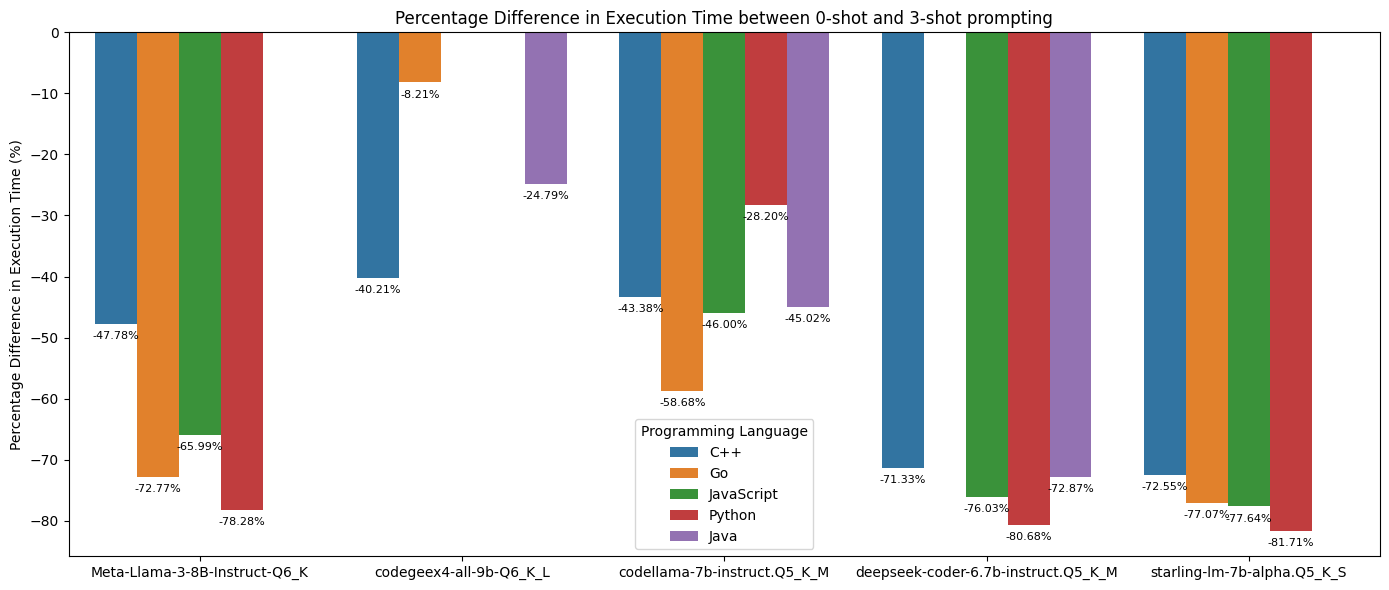

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']) / df_merged['Execution time (s)_0']) * 100

# Create bar plots for CPU Energy Percentage Difference
plt.figure(figsize=(14, 6))
barplot_energy = sns.barplot(data=df_merged, x='LLM', y='CPU Energy Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in CPU Energy Consumption between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Energy Consumption (%)')
plt.legend(title='Programming Language')

# Add labels on top of each bar, positioned lower
for p in barplot_energy.patches:
    barplot_energy.annotate(f'{p.get_height():.2f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                            ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Create bar plots for Execution Time Percentage Difference
plt.figure(figsize=(14, 6))
barplot_time = sns.barplot(data=df_merged, x='LLM', y='Execution Time Percentage Difference (%)', hue='Programming Language')
plt.title('Percentage Difference in Execution Time between 0-shot and 3-shot prompting')
plt.xlabel('')
plt.ylabel('Percentage Difference in Execution Time (%)')
plt.legend(title='Programming Language')

# Add labels on top of each bar, positioned lower
for p in barplot_time.patches:
    barplot_time.annotate(f'{p.get_height():.2f}%', 
                          (p.get_x() + p.get_width() / 2., p.get_height() - 2),  # Adjusting the position
                          ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


In [168]:
import pandas as pd

# Calculate the difference for CPU Energy and Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calculate the real differences
df_merged['CPU Energy Difference (J)'] = df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']
df_merged['Execution Time Difference (s)'] = df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']

# Calculate the percentage difference
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy Difference (J)']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution Time Difference (s)']) / df_merged['Execution time (s)_0']) * 100

# Select relevant columns for the final table
df_table = df_merged[['LLM', 'Programming Language', 
                      'CPU Energy Difference (J)', 'CPU Energy Percentage Difference (%)',
                      'Execution Time Difference (s)', 'Execution Time Percentage Difference (%)']]

# Display the table
df_table

,LLM,Programming Language,CPU Energy Difference (J),CPU Energy Percentage Difference (%),Execution Time Difference (s),Execution Time Percentage Difference (%)
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,-2195.632524,-46.778076,-34.405876,-47.775847
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,-3408.487410,-72.543258,-52.278192,-72.770986
2,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,-2562.617940,-65.394344,-39.620774,-65.987898
3,Meta-Llama-3-8B-Instruct-Q6_K,Python,-3781.052251,-77.536526,-58.495014,-78.280675
4,codegeex4-all-9b-Q6_K_L,C++,-2430.384594,-40.048695,-37.487935,-40.211920
5,codegeex4-all-9b-Q6_K_L,Go,-208.076310,-7.798734,-3.349717,-8.206267
6,codegeex4-all-9b-Q6_K_L,Java,-677.190551,-24.985027,-10.222334,-24.790774
7,codellama-7b-instruct.Q5_K_M,C++,-1049.482948,-42.795894,-16.240773,-43.377585
8,codellama-7b-instruct.Q5_K_M,Go,-1699.819616,-57.870360,-26.359027,-58.680174
9,codellama-7b-instruct.Q5_K_M,Java,-1115.442172,-43.964304,-17.246751,-45.016441


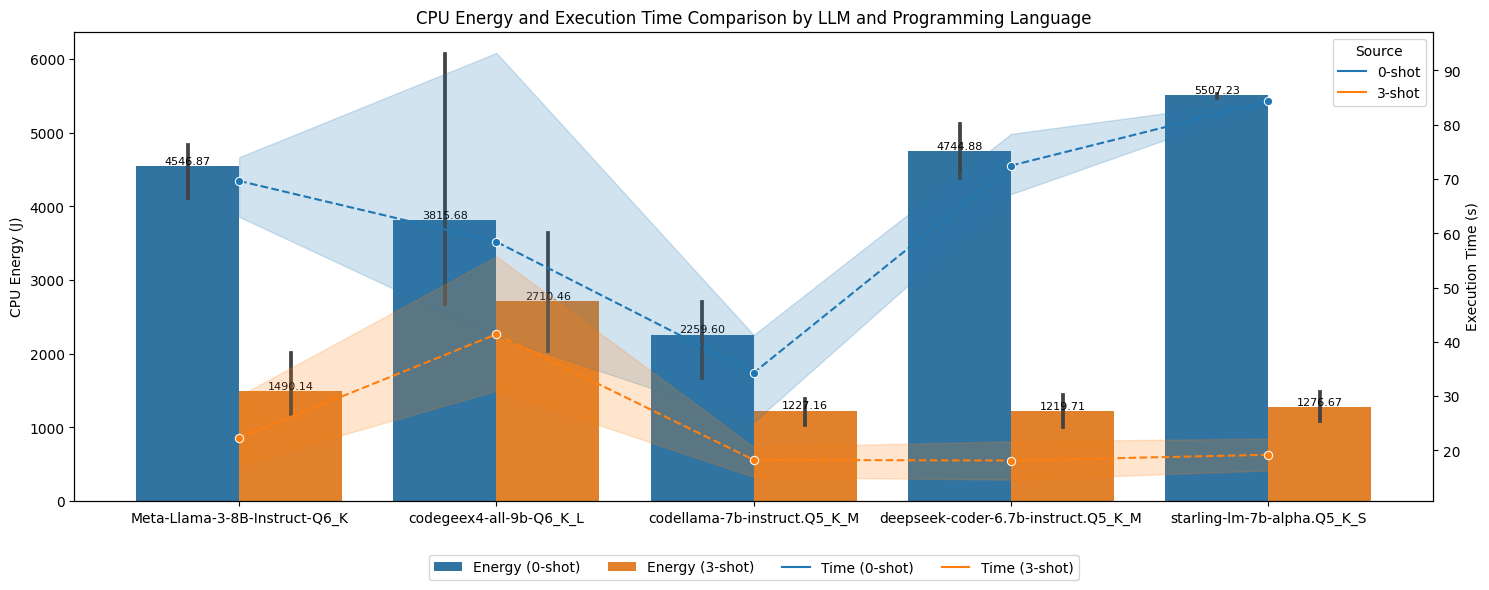

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão carregados

# Adicionar uma coluna para indicar o dataframe de origem
df_0_averages['Source'] = '0-shot'
df_3_averages['Source'] = '3-shot'

# Concatenar os DataFrames
merged_df = pd.concat([
    df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)', 'Source']],
    df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)', 'Source']]
], ignore_index=True)

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(15, 6))

# Criar as barras para CPU Energy
barplot = sns.barplot(data=merged_df, x='LLM', y='CPU Energy (J)', hue='Source', ax=ax1)

# Adicionar títulos e rótulos
plt.title('CPU Energy and Execution Time Comparison by LLM and Programming Language')
ax1.set_xlabel('')
ax1.set_ylabel('CPU Energy (J)')

# Adicionar rótulos em cima de cada barra
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=8)

# Criar o segundo eixo y para Execution Time
ax2 = ax1.twinx()

# Criar o lineplot para Execution Time
sns.lineplot(data=merged_df, x='LLM', y='Execution time (s)', hue='Source',
             marker='o', ax=ax2, palette='tab10', linestyle='--')

# Adicionar rótulos e título ao eixo y da direita
ax2.set_ylabel('Execution Time (s)')

# Obter handles e labels das legendas
handles1, labels1 = ax1.get_legend_handles_labels()  # Para o barplot
handles2, labels2 = ax2.get_legend_handles_labels()  # Para o lineplot

# Combinar handles e labels
handles = handles1 + handles2

# Alterar os nomes das legendas
labels = ['Energy (0-shot)', 'Energy (3-shot)', 'Time (0-shot)', 'Time (3-shot)']

# Adicionar legendas embaixo do gráfico
ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


### [FIX] HumanEval-x graphs

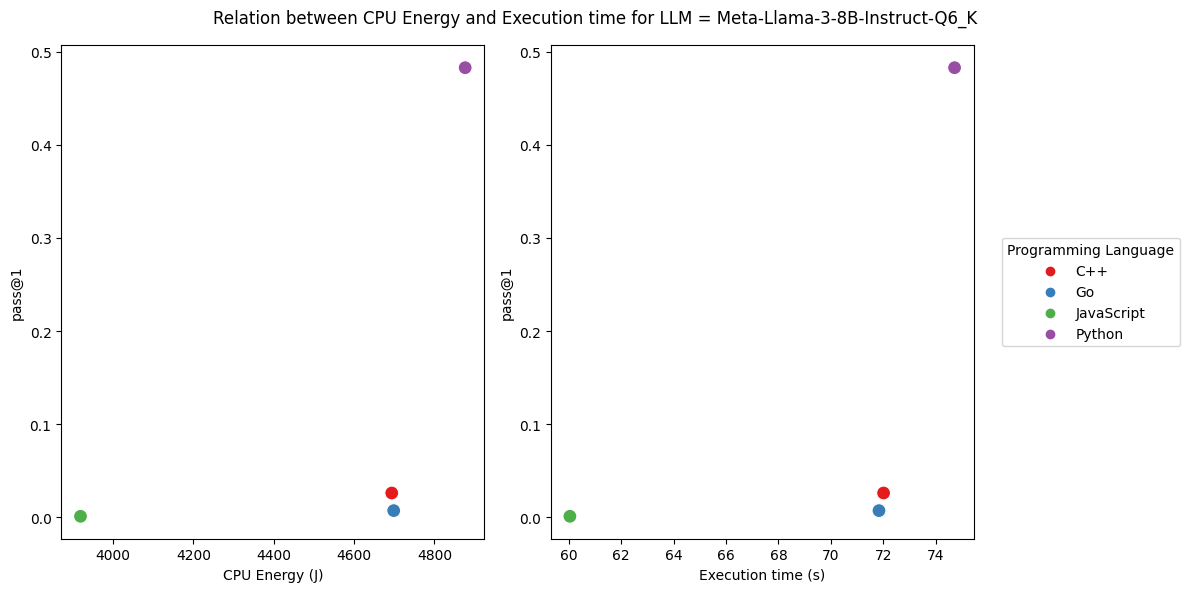

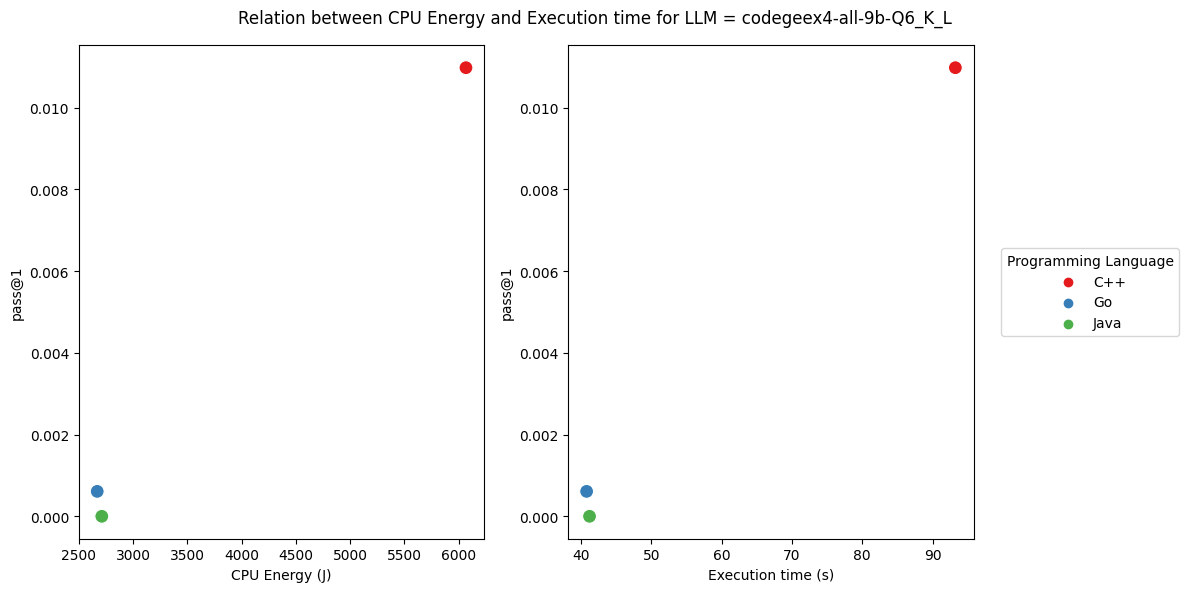

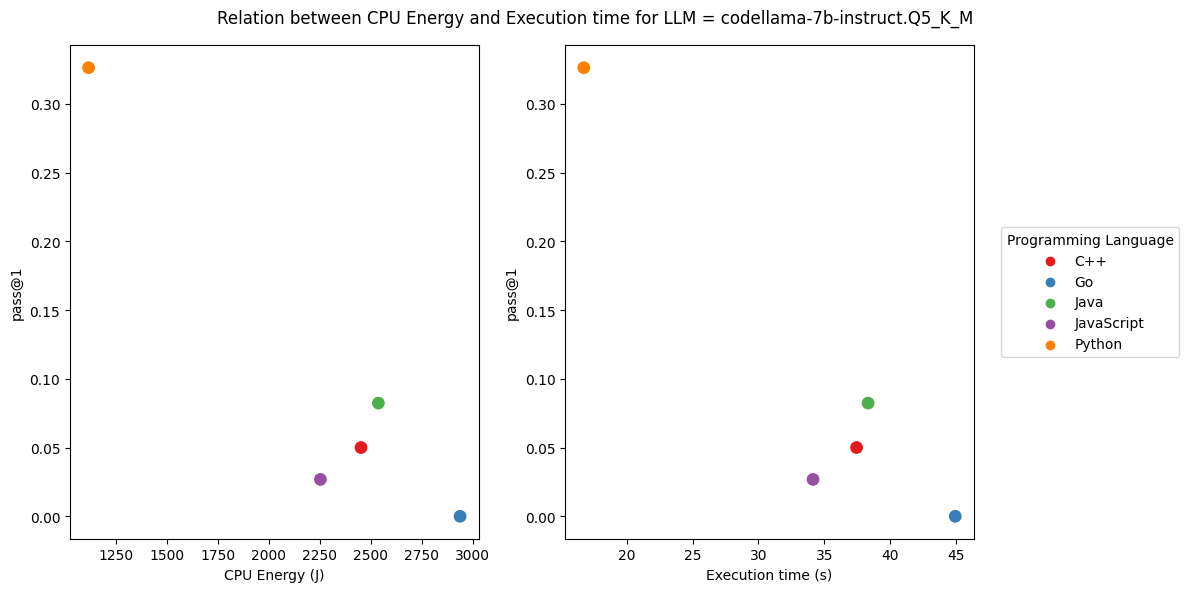

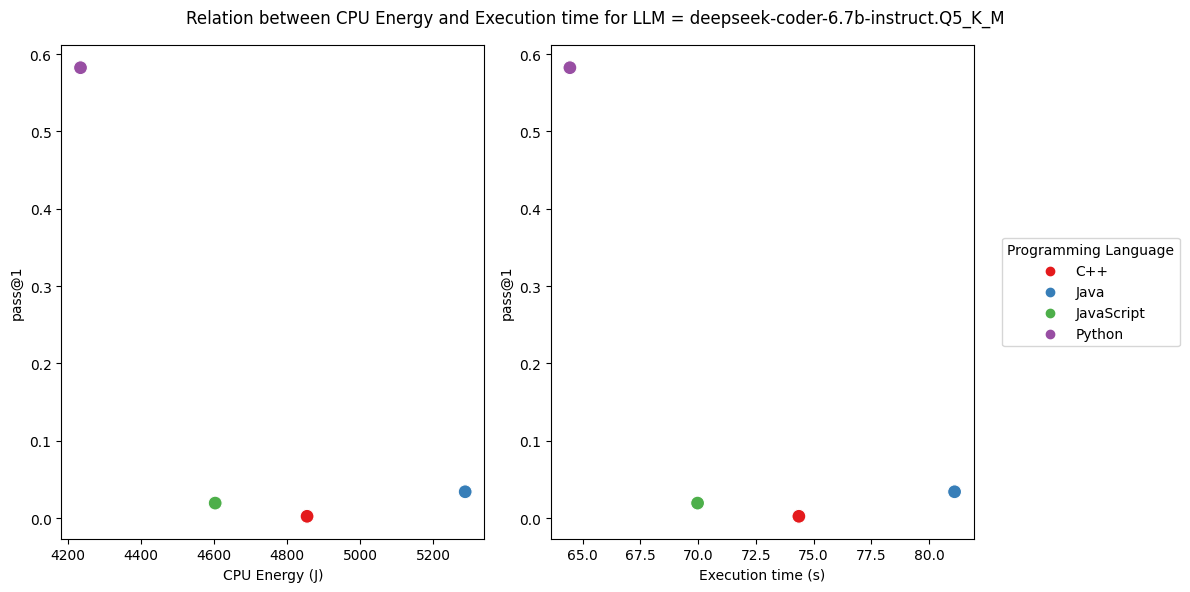

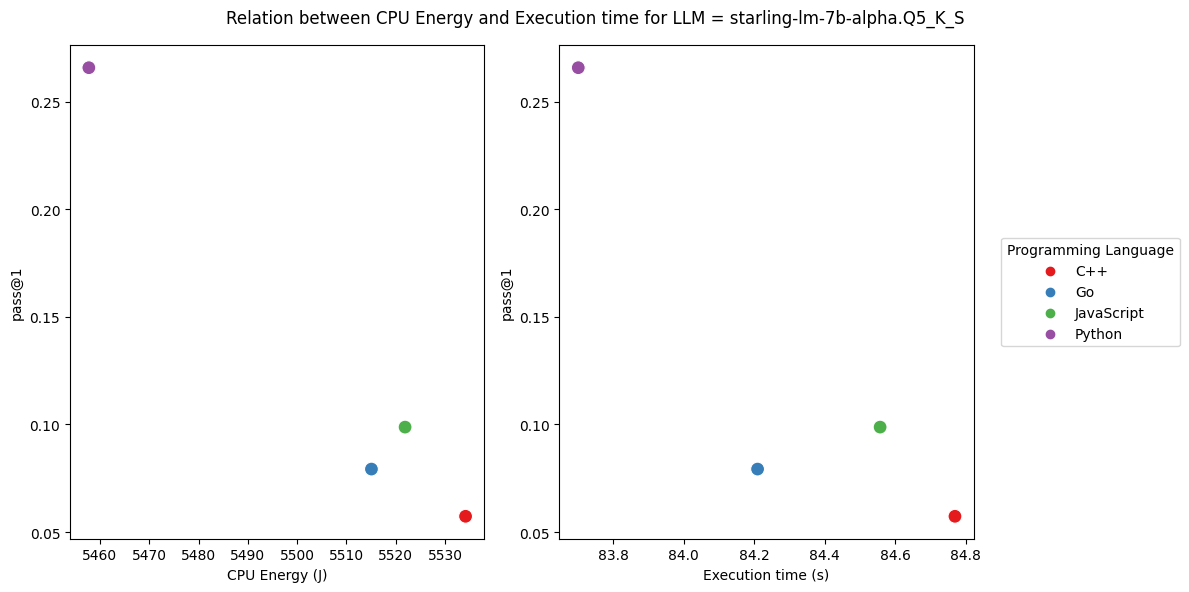

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values of "LLM"
llm_values = df_0_averages['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = df_0_averages[df_0_averages['LLM'] == llm_value]
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='Pass@1', hue='Programming Language', palette='Set1', s=100, legend=False, ax=axs[0])
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='Pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(handles, labels, title='Programming Language', bbox_to_anchor=(1.05, 0.5), loc='center left')

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


### [FIX] 0-shot vs N-shot prompting

In [171]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    df_filtered_n = df_n_shot[df_n_shot['LLM'] == llm_value]  # Filtrar o segundo DataFrame
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, ax=axs[0])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, marker='x', ax=axs[0])
    
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, marker='x', ax=axs[1])

    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    
    class LegendTitle(object):
        def __init__(self, text_props=None):
            self.text_props = text_props or {}
            super(LegendTitle, self).__init__()

        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
            handlebox.add_artist(title)
            return title

    # Adicionando títulos personalizados à legenda
    legend = axs[1].legend(['0-shot prompting'] + handles[:5] + ['','N-shot prompting'] + handles[5:], 
                           [''] + labels[:5] + ['',''] + labels[5:],
                           handler_map={str: LegendTitle({'fontsize': 9})},
                           bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=2)

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


NameError: name 'mean_cleaned_df_humaneval_x' is not defined

#### Energy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['CPU Energy (J)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['CPU Energy (J)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('CPU Energy (J)')
    ax.set_title(f'CPU Energy (J) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='CPU Energy (J)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#### Time

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['Execution time (s)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['Execution time (s)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('Execution time (s)')
    ax.set_title(f'Execution time (s) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='Execution time (s)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()
